In [2]:
import os
import pandas as pd
import numpy as np
pd.options.display.max_rows = 999

In [3]:
os.getcwd()

'/Users/mindongsung/Work/20220329_python_lecture/notebook'

In [4]:
# read data
aps_input = pd.read_csv('../data/processed/aps_input.csv')
other_input = pd.read_csv('../data/processed/other_input.csv')
outcomes = pd.read_csv('../data/processed/outcomes.csv')

In [5]:
aps_input.head()

,patientunitstayid,intubated,vent,dialysis,eyes,motor,verbal,meds,urine,wbc,...,ph,hematocrit,creatinine,albumin,pao2,pco2,bun,glucose,bilirubin,fio2
0,141168,0,0,0,4,6,5,0,-1.0,14.7,...,-1.00,40.1,2.30,3.1,-1.0,-1.0,27.0,95.0,4.1,-1.0
1,141178,0,0,0,-1,-1,-1,-1,-1.0,-1.0,...,-1.00,-1.0,-1.00,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
2,141194,0,0,0,3,6,4,0,-1.0,14.1,...,-1.00,27.4,2.51,2.3,-1.0,-1.0,31.0,168.0,0.4,-1.0
3,141197,0,0,0,4,6,5,0,-1.0,-1.0,...,-1.00,-1.0,-1.00,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
4,141203,0,1,0,1,3,1,0,-1.0,12.7,...,7.45,36.9,0.56,-1.0,51.0,37.0,9.0,145.0,-1.0,100.0


In [6]:
print(aps_input.columns)
print(other_input.columns)
print(outcomes.columns)

Index(['patientunitstayid', 'intubated', 'vent', 'dialysis', 'eyes', 'motor',
       'verbal', 'meds', 'urine', 'wbc', 'temperature', 'respiratoryrate',
       'sodium', 'heartrate', 'meanbp', 'ph', 'hematocrit', 'creatinine',
       'albumin', 'pao2', 'pco2', 'bun', 'glucose', 'bilirubin', 'fio2'],
      dtype='object')
Index(['patientunitstayid', 'gender', 'age', 'admitdiagnosis', 'aids',
       'hepaticfailure', 'lymphoma', 'metastaticcancer', 'leukemia',
       'immunosuppression', 'cirrhosis', 'electivesurgery', 'activetx',
       'readmit', 'diabetes'],
      dtype='object')
Index(['patientunitstayid', 'actualicumortality', 'actualhospitalmortality',
       'actualhospitallos'],
      dtype='object')


In [7]:
# merge data
data = aps_input.merge(other_input, on='patientunitstayid', how='inner')
data = data.merge(outcomes, on='patientunitstayid', how='inner')
data = data.reset_index(drop = True)

In [8]:
#null
data = data.replace(-1, np.nan)

In [9]:
# dtype
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297064 entries, 0 to 297063
Data columns (total 42 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   patientunitstayid        297064 non-null  int64  
 1   intubated                297064 non-null  int64  
 2   vent                     297064 non-null  int64  
 3   dialysis                 297064 non-null  int64  
 4   eyes                     292484 non-null  float64
 5   motor                    292484 non-null  float64
 6   verbal                   292484 non-null  float64
 7   meds                     295524 non-null  float64
 8   urine                    152894 non-null  float64
 9   wbc                      226936 non-null  float64
 10  temperature              284808 non-null  float64
 11  respiratoryrate          295144 non-null  float64
 12  sodium                   239690 non-null  float64
 13  heartrate                296344 non-null  float64
 14  mean

In [10]:
data.columns

Index(['patientunitstayid', 'intubated', 'vent', 'dialysis', 'eyes', 'motor',
       'verbal', 'meds', 'urine', 'wbc', 'temperature', 'respiratoryrate',
       'sodium', 'heartrate', 'meanbp', 'ph', 'hematocrit', 'creatinine',
       'albumin', 'pao2', 'pco2', 'bun', 'glucose', 'bilirubin', 'fio2',
       'gender', 'age', 'admitdiagnosis', 'aids', 'hepaticfailure', 'lymphoma',
       'metastaticcancer', 'leukemia', 'immunosuppression', 'cirrhosis',
       'electivesurgery', 'activetx', 'readmit', 'diabetes',
       'actualicumortality', 'actualhospitalmortality', 'actualhospitallos'],
      dtype='object')

In [11]:
categorical_columns = ["intubated", "vent", "dialysis", 'gender', 'aids','hepaticfailure','lymphoma', 'metastaticcancer', 'leukemia', 'immunosuppression','cirrhosis', 'electivesurgery', 'activetx', 'readmit','diabetes', 'actualicumortality','actualhospitalmortality', 'admitdiagnosis']
float_columns = ['urine', 'wbc', 'temperature', 'respiratoryrate','sodium', 'meanbp', 'ph', 'hematocrit', 'creatinine', 'albumin', 'pao2', 'pco2', 'bun', 'glucose', 'bilirubin', 'fio2','actualhospitallos']
int_columns = ['patientunitstayid', "eyes", "motor", 'verbal', 'meds', 'heartrate', 'age']

In [12]:
import numpy as np
data[float_columns] = data[float_columns].replace(-1, np.nan).astype(float)
data[int_columns] = data[int_columns].astype("Int64")
data[categorical_columns] = data[categorical_columns].astype('category')

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297064 entries, 0 to 297063
Data columns (total 42 columns):
 #   Column                   Non-Null Count   Dtype   
---  ------                   --------------   -----   
 0   patientunitstayid        297064 non-null  Int64   
 1   intubated                297064 non-null  category
 2   vent                     297064 non-null  category
 3   dialysis                 297064 non-null  category
 4   eyes                     292484 non-null  Int64   
 5   motor                    292484 non-null  Int64   
 6   verbal                   292484 non-null  Int64   
 7   meds                     295524 non-null  Int64   
 8   urine                    152894 non-null  float64 
 9   wbc                      226936 non-null  float64 
 10  temperature              284808 non-null  float64 
 11  respiratoryrate          295144 non-null  float64 
 12  sodium                   239690 non-null  float64 
 13  heartrate                296344 non-null  In

In [14]:
data.actualhospitalmortality.head()

0    EXPIRED
1    EXPIRED
2      ALIVE
3      ALIVE
4      ALIVE
Name: actualhospitalmortality, dtype: category
Categories (2, object): ['ALIVE', 'EXPIRED']

In [15]:
# null check
null_count = data.isnull().sum() / len(data) * 100
null_count

patientunitstayid           0.000000
intubated                   0.000000
vent                        0.000000
dialysis                    0.000000
eyes                        1.541755
motor                       1.541755
verbal                      1.541755
meds                        0.518407
urine                      48.531630
wbc                        23.607034
temperature                 4.125710
respiratoryrate             0.646325
sodium                     19.313683
heartrate                   0.242372
meanbp                      0.323836
ph                         76.478469
hematocrit                 21.500417
creatinine                 19.634826
albumin                    60.379582
pao2                       76.478469
pco2                       76.478469
bun                        20.013869
glucose                    11.225191
bilirubin                  64.036033
fio2                       76.478469
gender                      0.035683
age                         0.000000
a

<AxesSubplot:>

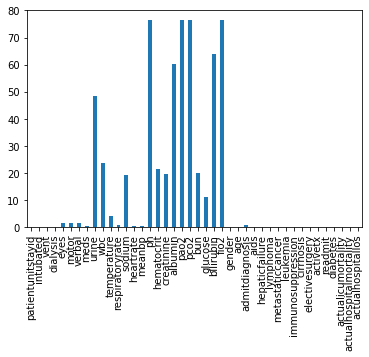

In [16]:
null_count.plot.bar()

In [17]:
import pandas_profiling  #pandas <= 1.3.5 

In [22]:
data.iloc[:,1:-1]

,intubated,vent,dialysis,eyes,motor,verbal,meds,urine,wbc,temperature,...,metastaticcancer,leukemia,immunosuppression,cirrhosis,electivesurgery,activetx,readmit,diabetes,actualicumortality,actualhospitalmortality
0,0,0,0,4,6,5,0,NaN,14.7,36.1,...,0,0,0,0,0,1,0,0,EXPIRED,EXPIRED
1,0,0,0,4,6,5,0,NaN,14.7,36.1,...,0,0,0,0,0,1,0,0,EXPIRED,EXPIRED
2,0,0,0,3,6,4,0,NaN,14.1,39.3,...,0,0,0,0,0,0,0,1,ALIVE,ALIVE
3,0,0,0,3,6,4,0,NaN,14.1,39.3,...,0,0,0,0,0,0,0,1,ALIVE,ALIVE
4,0,1,0,1,3,1,0,NaN,12.7,35.1,...,0,0,0,0,0,1,0,1,ALIVE,ALIVE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297059,1,1,0,1,1,1,0,358.992,NaN,32.9,...,0,0,0,0,0,1,0,1,ALIVE,ALIVE
297060,0,0,0,4,6,5,0,2171.664,NaN,35.5,...,0,0,0,0,0,1,0,0,ALIVE,ALIVE
297061,0,0,0,4,6,5,0,2171.664,NaN,35.5,...,0,0,0,0,0,1,0,0,ALIVE,ALIVE
297062,0,0,0,4,6,5,0,NaN,NaN,37.1,...,0,0,0,0,0,0,0,0,ALIVE,ALIVE


In [31]:
profile = data.iloc[:,1:-1].profile_report(title="Pandas Profiling Report",
                                           correlations={
                                                "pearson": {"calculate": True},
                                                "spearman": {"calculate": False},
                                                "kendall": {"calculate": False},
                                                "phi_k": {"calculate": False},
                                                "cramers": {"calculate": False},
                                            },
                                            infer_dtypes=False,
                                            duplicates={"head":0},
)

In [33]:
profile.to_file('./pr_report.html')

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 23.60it/s]


In [ ]:
data.to_pickle('../data/processed/data.pkl')